In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bobnau/daily-website-visitors")

print("Path to dataset files:", path)

100%|██████████| 34.9k/34.9k [00:00<00:00, 19.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bobnau/daily-website-visitors/versions/1


In [3]:
import pandas as pd
import os
for file in os.listdir(path):
    print(file)

daily-website-visitors.csv


In [4]:
csv_path = os.path.join(path, 'daily-website-visitors.csv')
df = pd.read_csv(csv_path)
df.head()


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [5]:
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [6]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
df.drop(columns=['Row', 'Day', 'Day.Of.Week'], inplace=True)

In [12]:
df

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-14,"2,146","1,582","1,430",152
2014-09-15,"3,621","2,528","2,297",231
2014-09-16,"3,698","2,630","2,352",278
2014-09-17,"3,667","2,614","2,327",287
2014-09-18,"3,316","2,366","2,130",236
...,...,...,...,...
2020-08-15,"2,221","1,696","1,373",323
2020-08-16,"2,724","2,037","1,686",351
2020-08-17,"3,456","2,638","2,181",457


In [14]:
for col in df.columns:
    df[col] = df[col].str.replace(',', '').astype(int)


In [15]:
print(df.dtypes)
print(df.head())

Page.Loads           int64
Unique.Visits        int64
First.Time.Visits    int64
Returning.Visits     int64
dtype: object
            Page.Loads  Unique.Visits  First.Time.Visits  Returning.Visits
Date                                                                      
2014-09-14        2146           1582               1430               152
2014-09-15        3621           2528               2297               231
2014-09-16        3698           2630               2352               278
2014-09-17        3667           2614               2327               287
2014-09-18        3316           2366               2130               236


In [16]:
df

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2014-09-14,2146,1582,1430,152
2014-09-15,3621,2528,2297,231
2014-09-16,3698,2630,2352,278
2014-09-17,3667,2614,2327,287
2014-09-18,3316,2366,2130,236
...,...,...,...,...
2020-08-15,2221,1696,1373,323
2020-08-16,2724,2037,1686,351
2020-08-17,3456,2638,2181,457


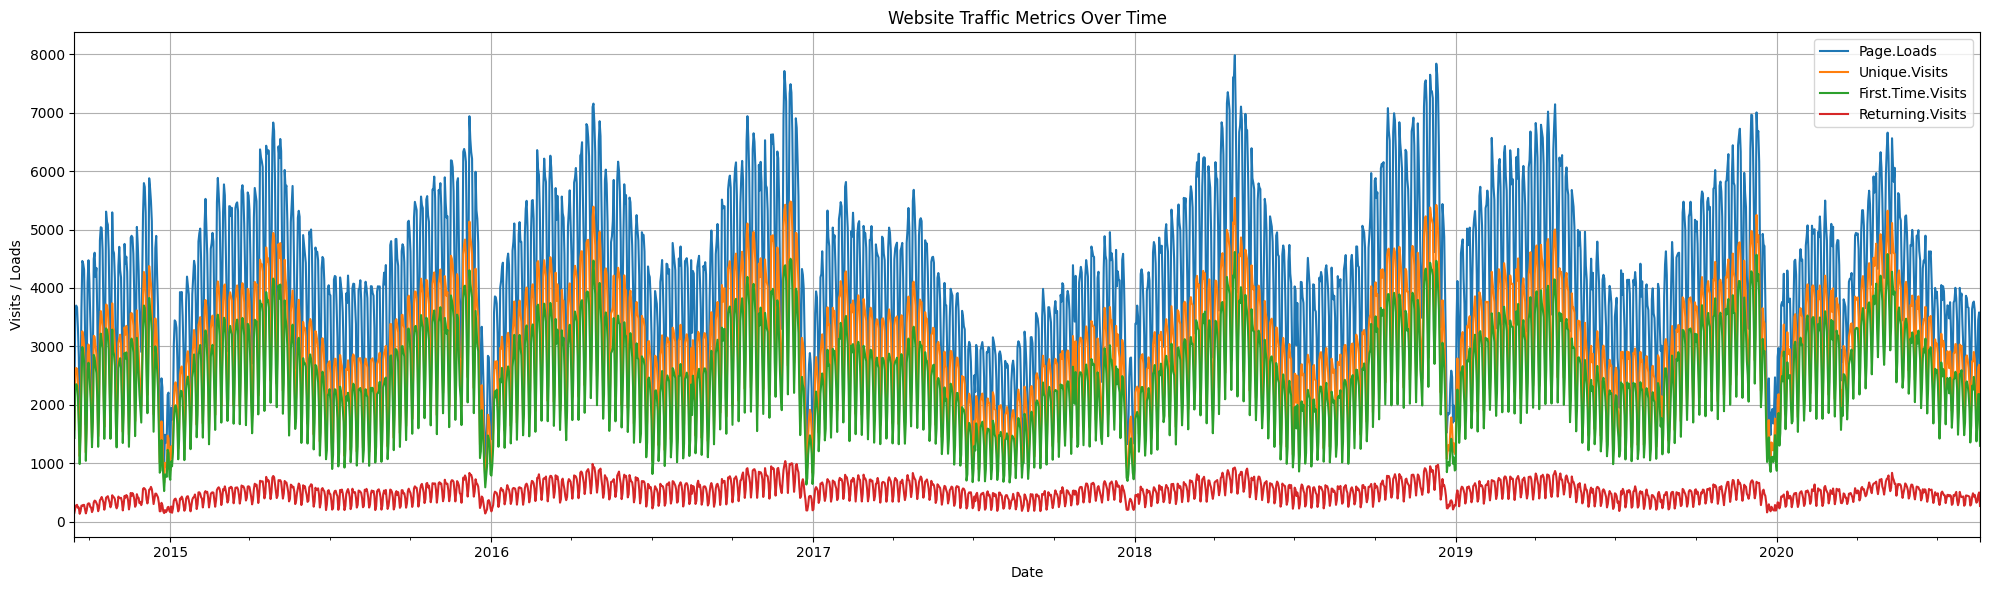

In [20]:
import matplotlib.pyplot as plt

df.plot(figsize=(20, 6), title="Website Traffic Metrics за весь час")
plt.ylabel("Visits / Loads")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
start_date = '2018-01-01'
end_date = '2018-12-31'

df_year_2018 = df.loc[start_date:end_date]

df_year_2018.head()

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,
2018-01-01,1709,1120,878,242
2018-01-02,3389,2208,1755,453
2018-01-03,3391,2282,1827,455
2018-01-04,3698,2310,1878,432
2018-01-05,3511,2272,1801,471


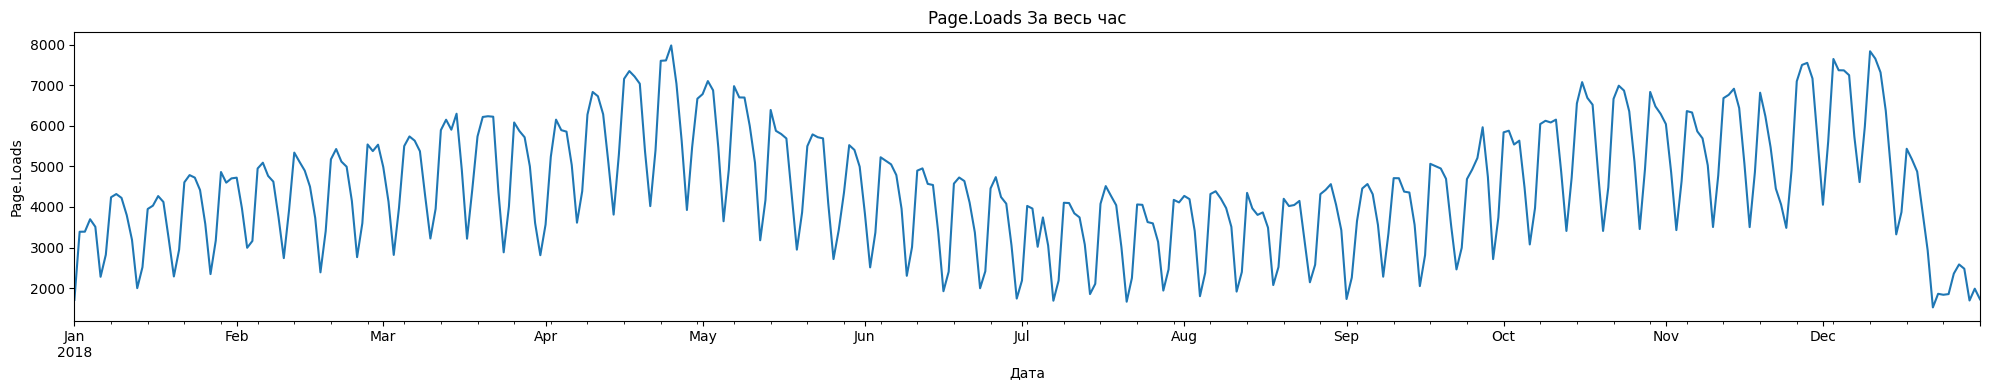

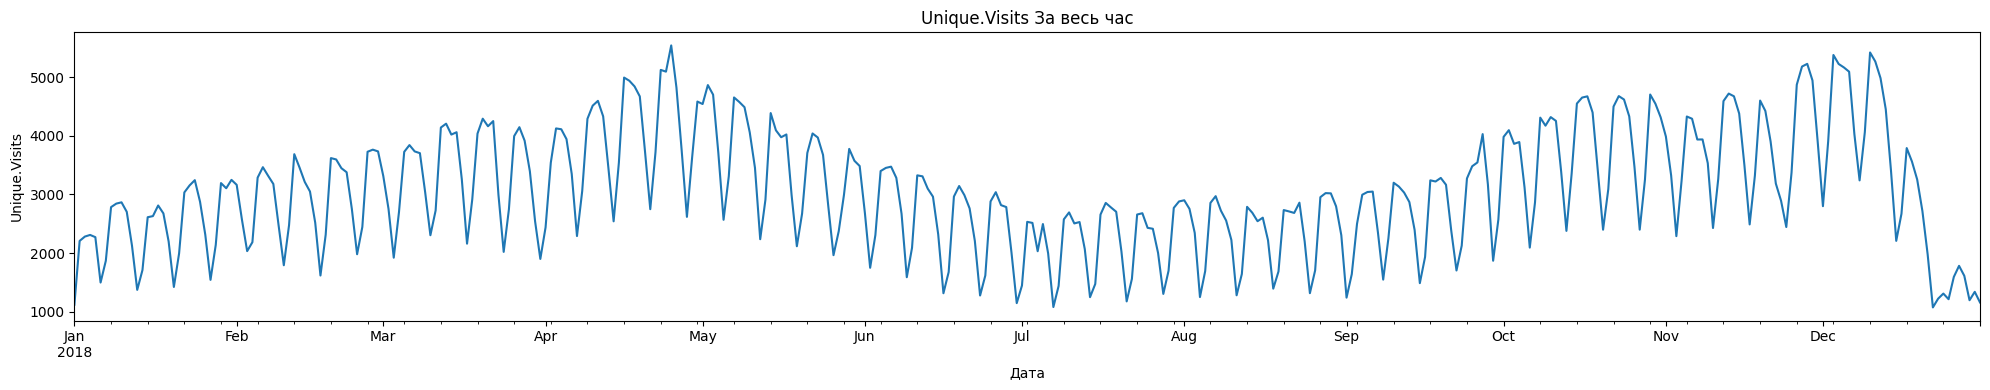

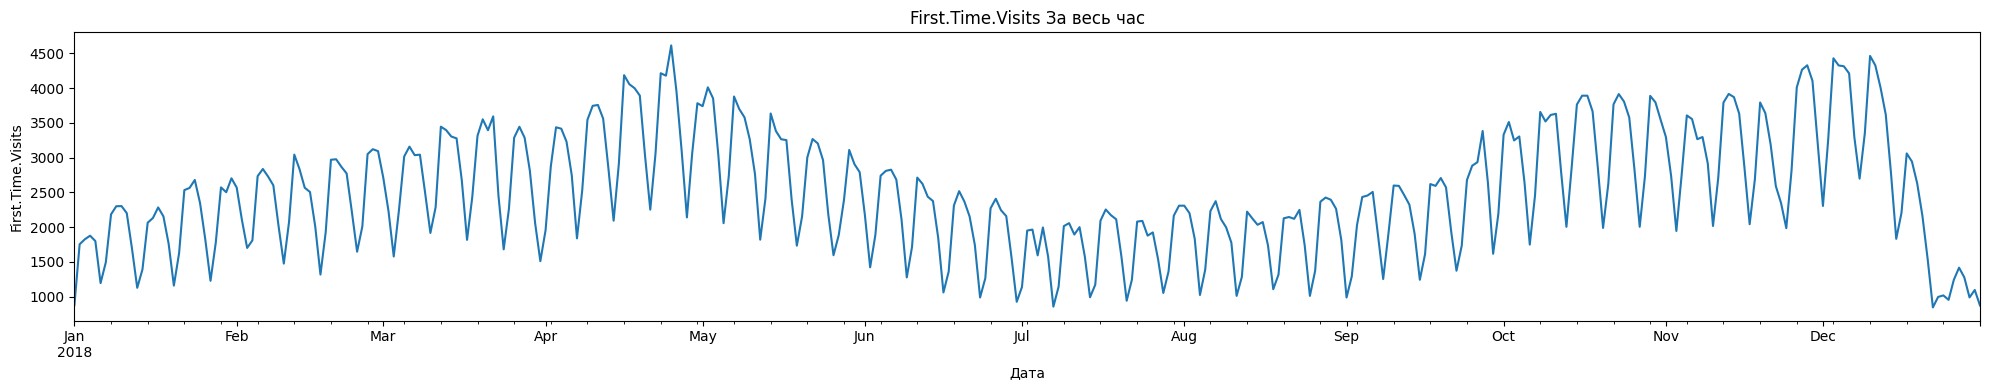

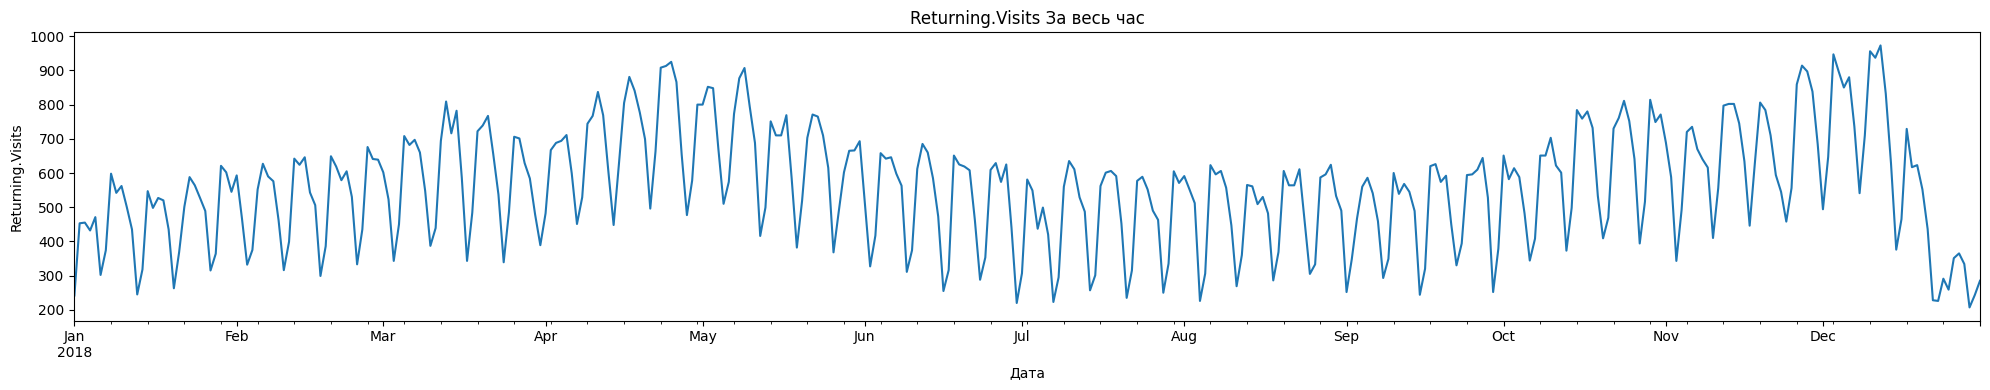

In [53]:
for col in df_year_2018.columns:
    plt.figure(figsize=(20, 4))
    df_year_2018[col].plot()
    plt.title(f"{col} За весь час")
    plt.xlabel("Дата")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

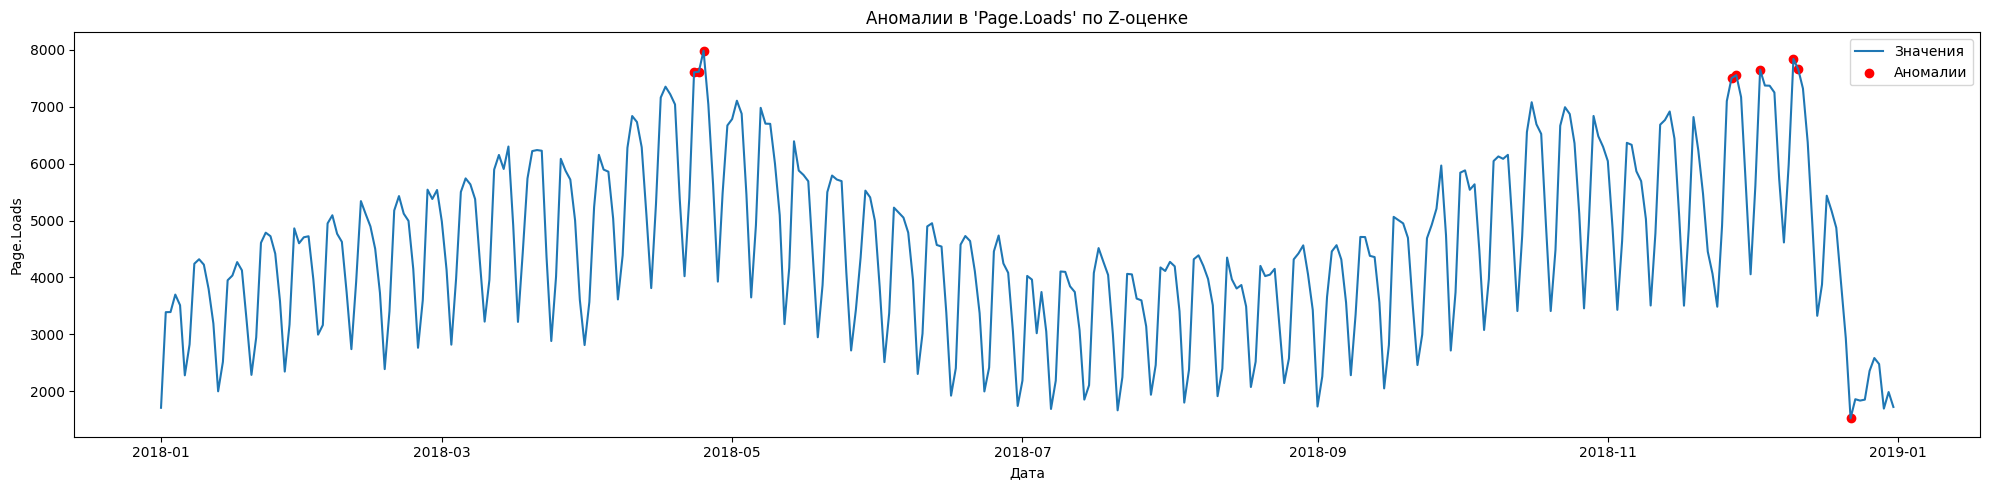

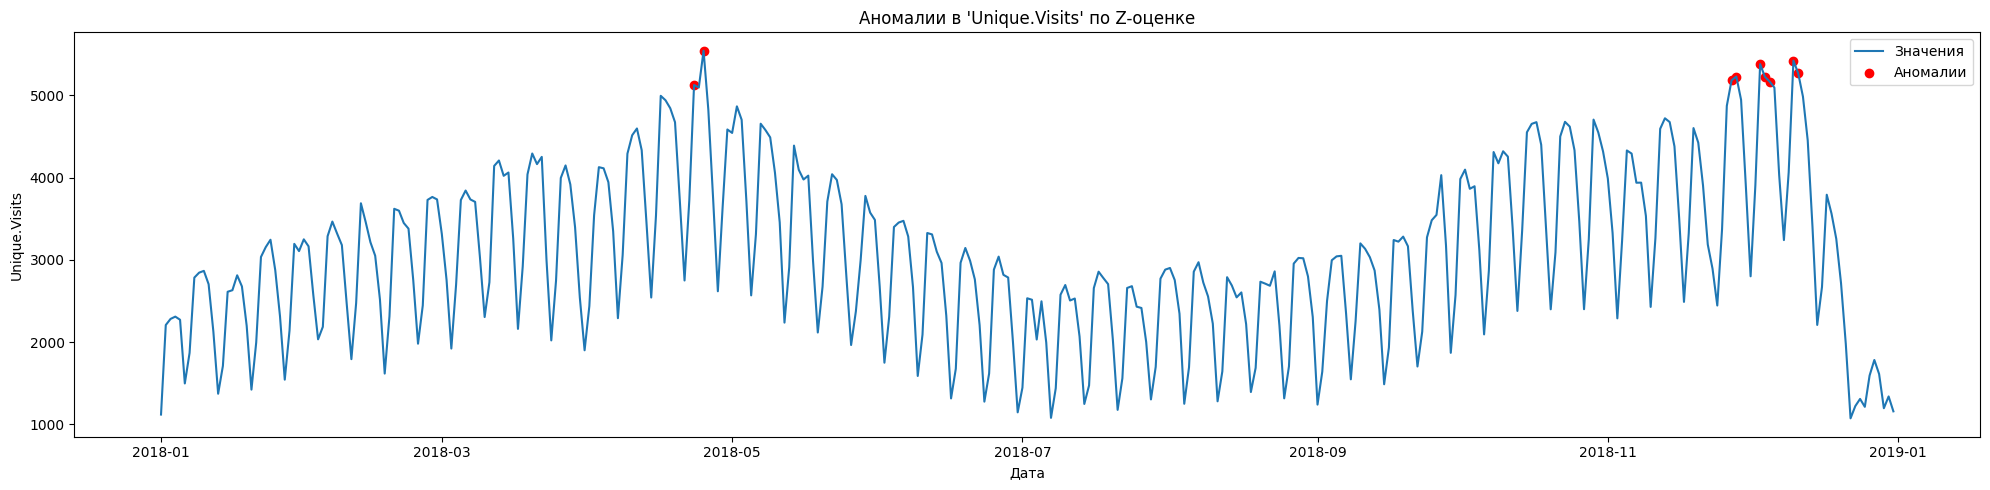

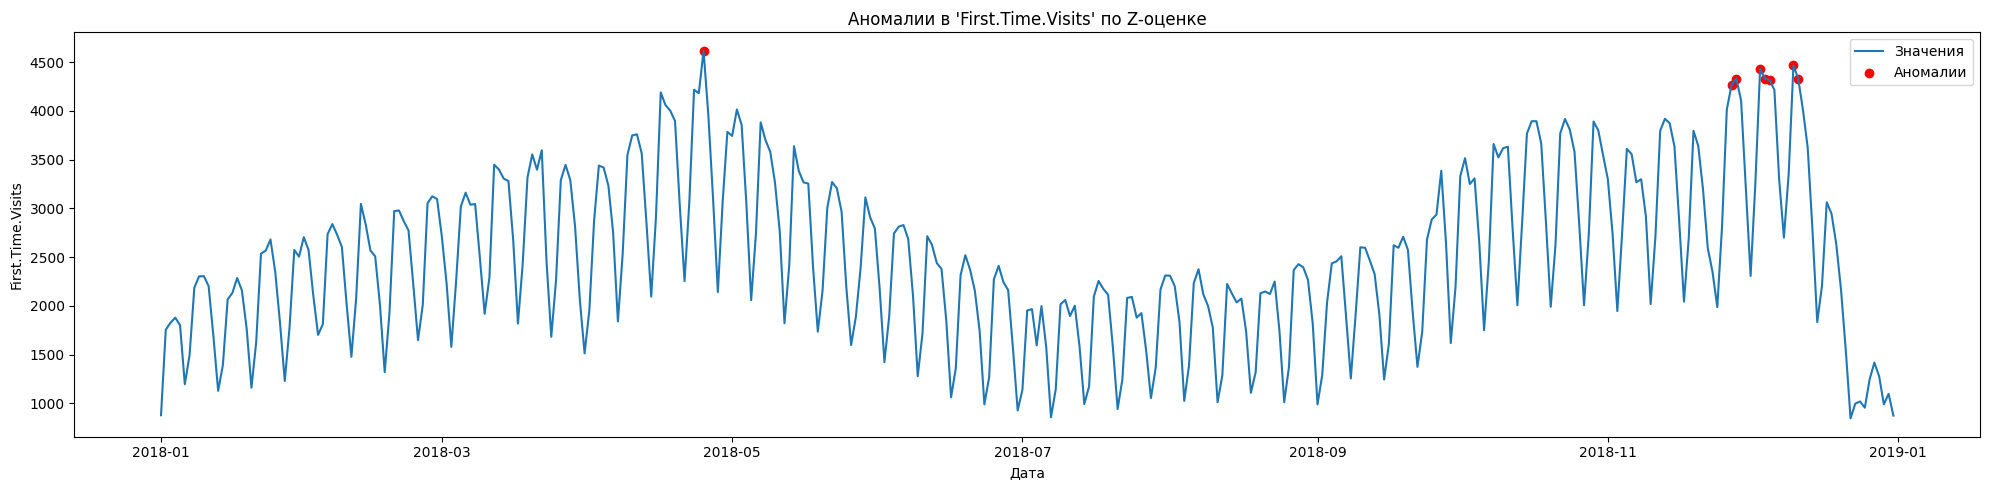

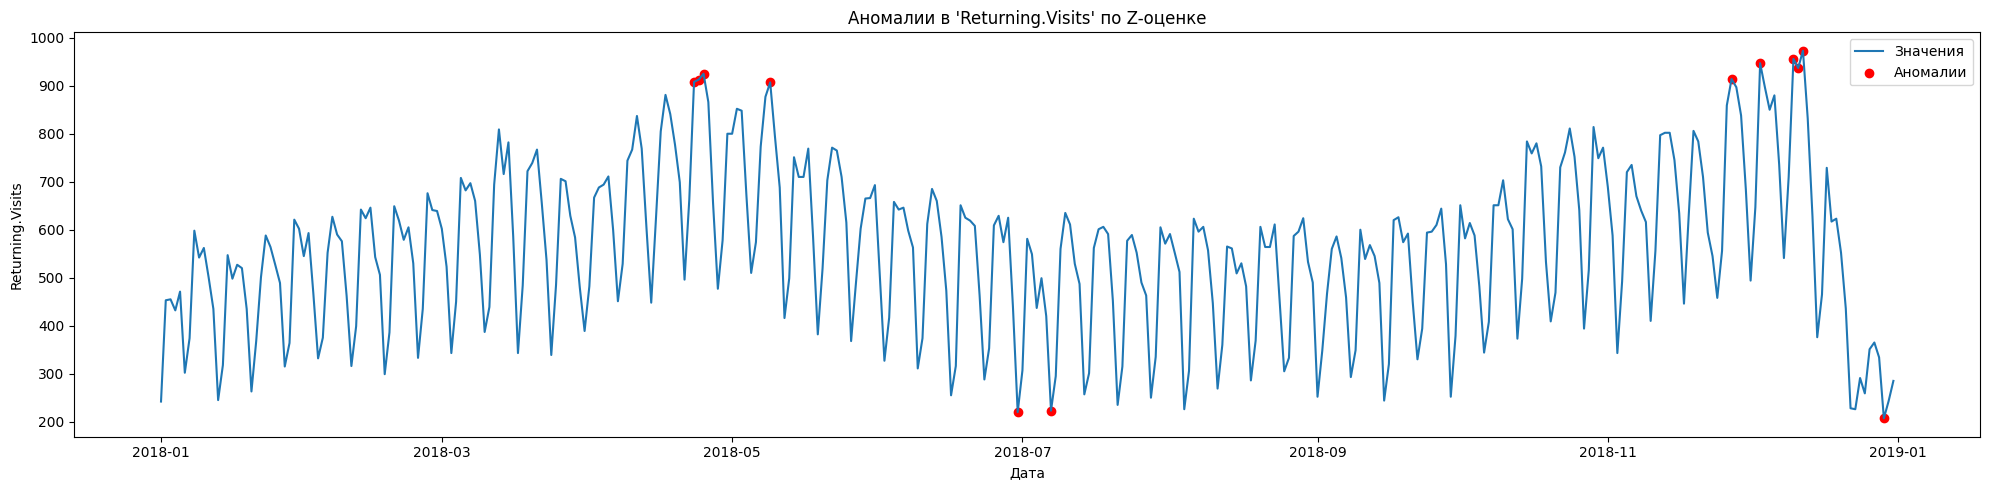

In [43]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt


selected_columns = df_year_2018.columns
threshold = 2

for col in selected_columns:
    z_scores = zscore(df_year_2018[col])

    anomalies = np.abs(z_scores) > threshold

    plt.figure(figsize=(20, 5))
    plt.plot(df_year_2018.index, df_year_2018[col], label='Значення')
    plt.scatter(df_year_2018.index[anomalies], df_year_2018[col][anomalies], color='red', label='Аномалії')
    plt.title(f"Аномалії в '{col}' за Z-оцінкою")
    plt.xlabel("Дата")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

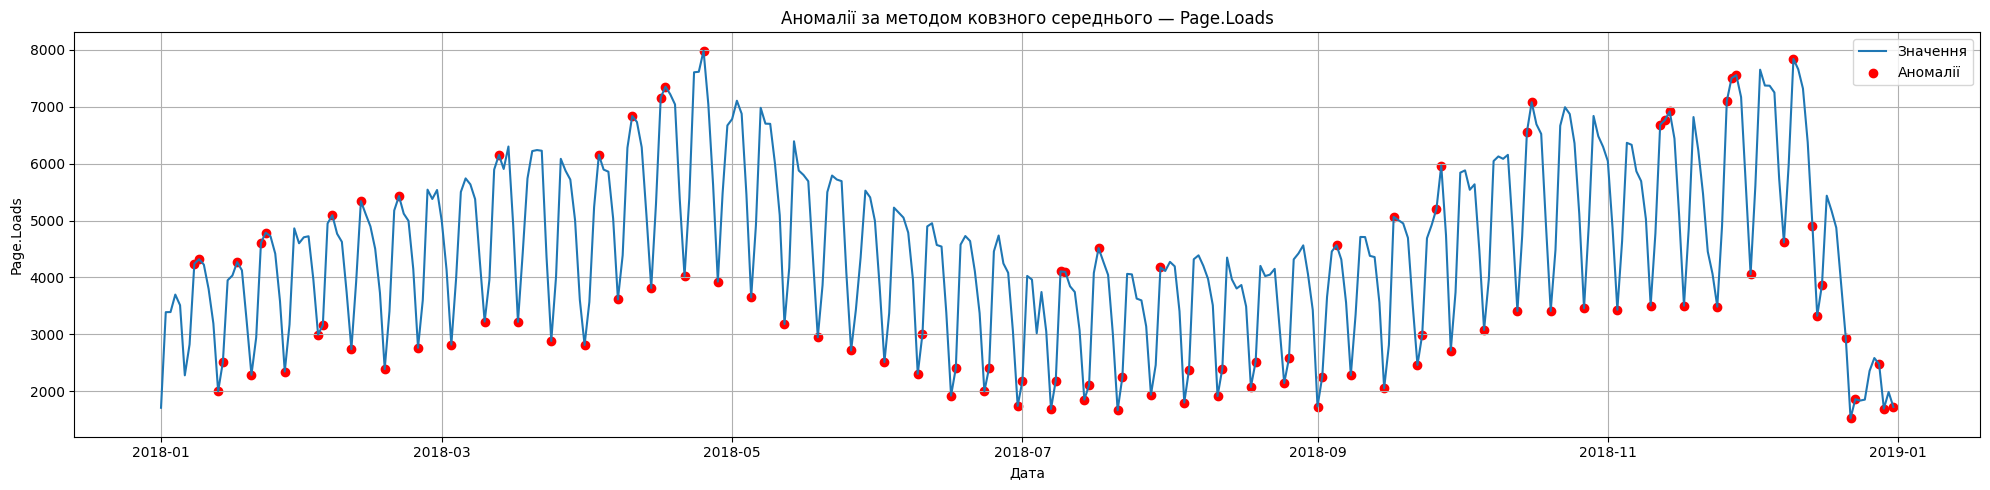

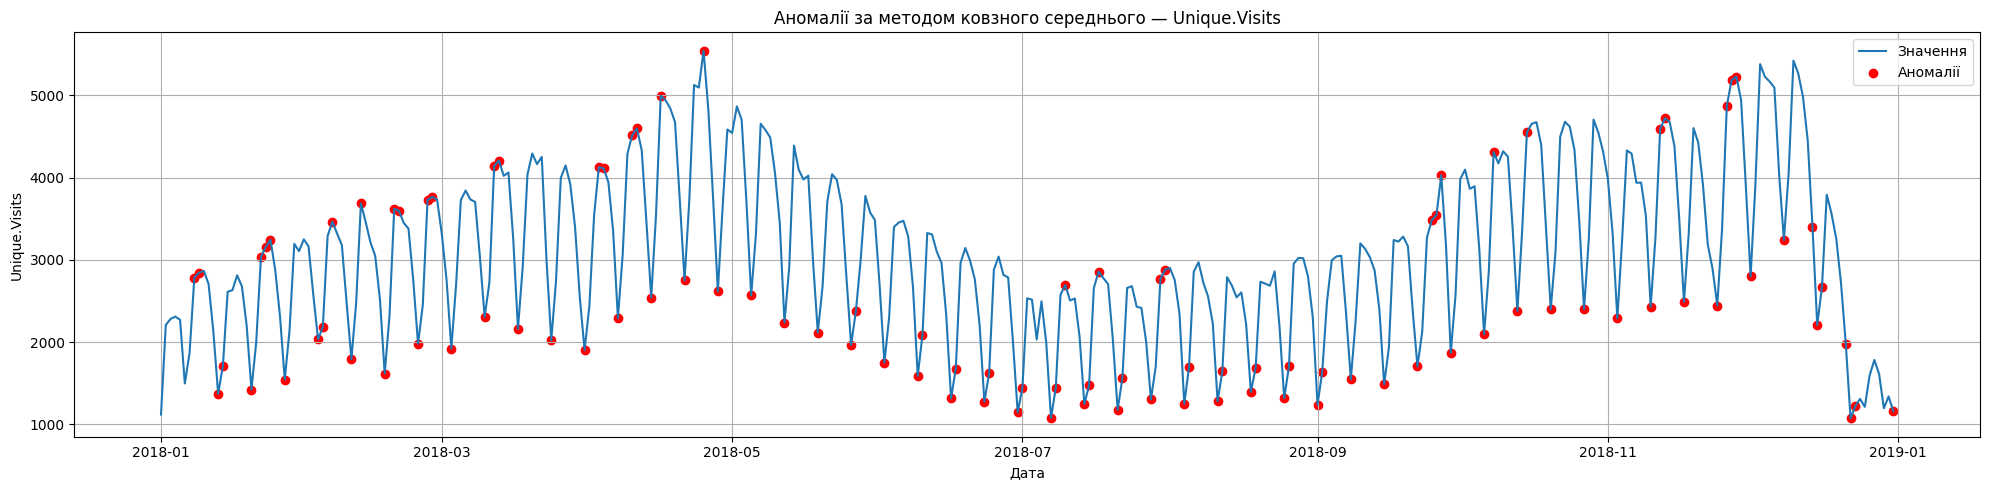

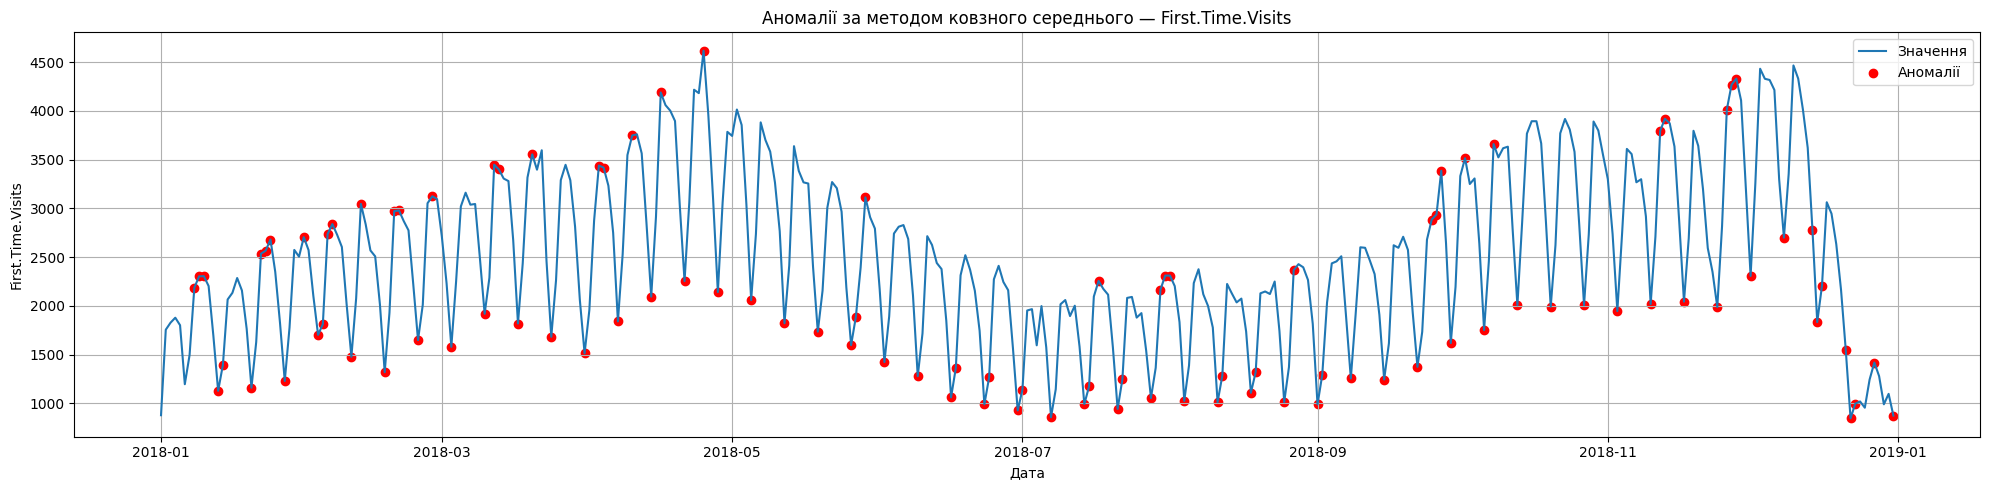

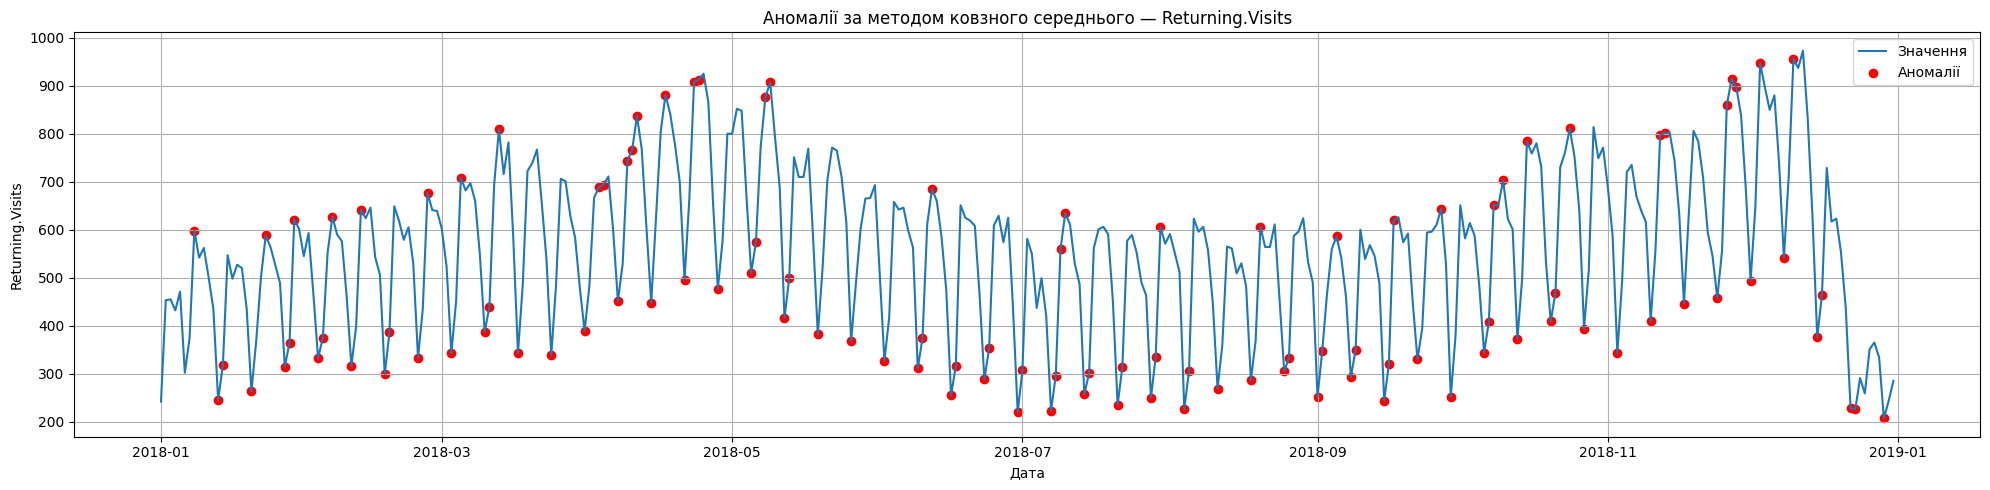

In [49]:
window_size = 7  # 7-дневное скользящее среднее
threshold = 1

for col in df_year_2018.columns:
    series = df_year_2018[[col]].copy()
    series['rolling_mean'] = series[col].rolling(window=window_size).mean()
    series['rolling_std'] = series[col].rolling(window=window_size).std()

    anomalies = series[
        (series[col] > series['rolling_mean'] + threshold * series['rolling_std']) |
        (series[col] < series['rolling_mean'] - threshold * series['rolling_std'])
    ]

    plt.figure(figsize=(20, 5))
    plt.plot(series.index, series[col], label='Значення')
    plt.scatter(anomalies.index, anomalies[col], color='red', label='Аномалії')
    plt.title(f"Аномалії за методом ковзного середнього — {col}")
    plt.xlabel("Дата")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


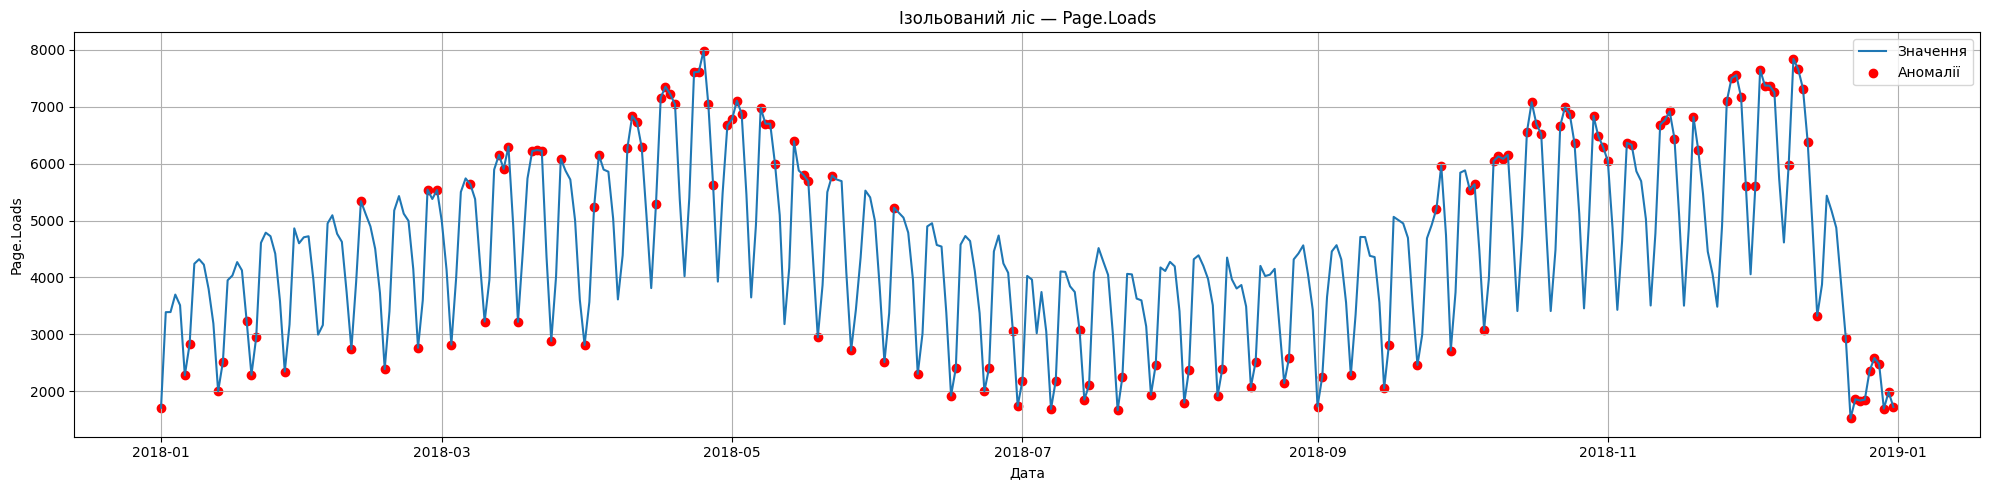

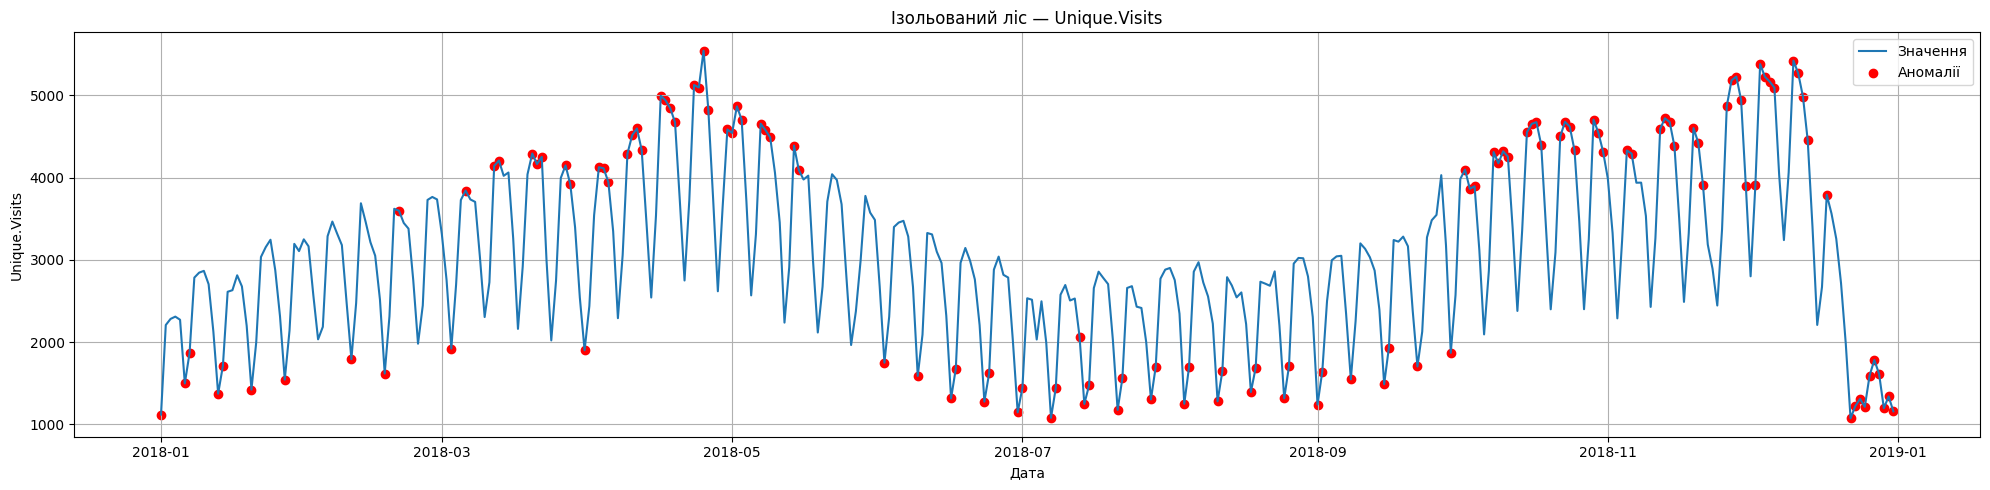

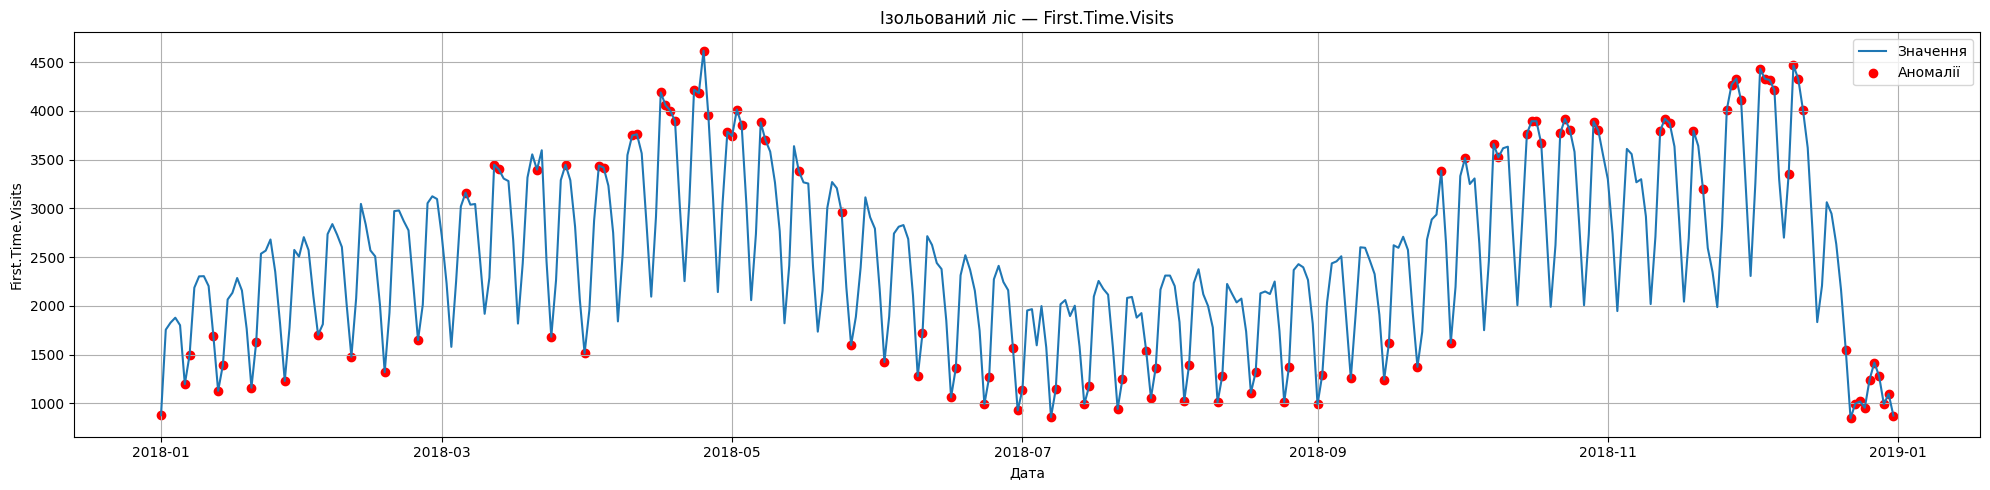

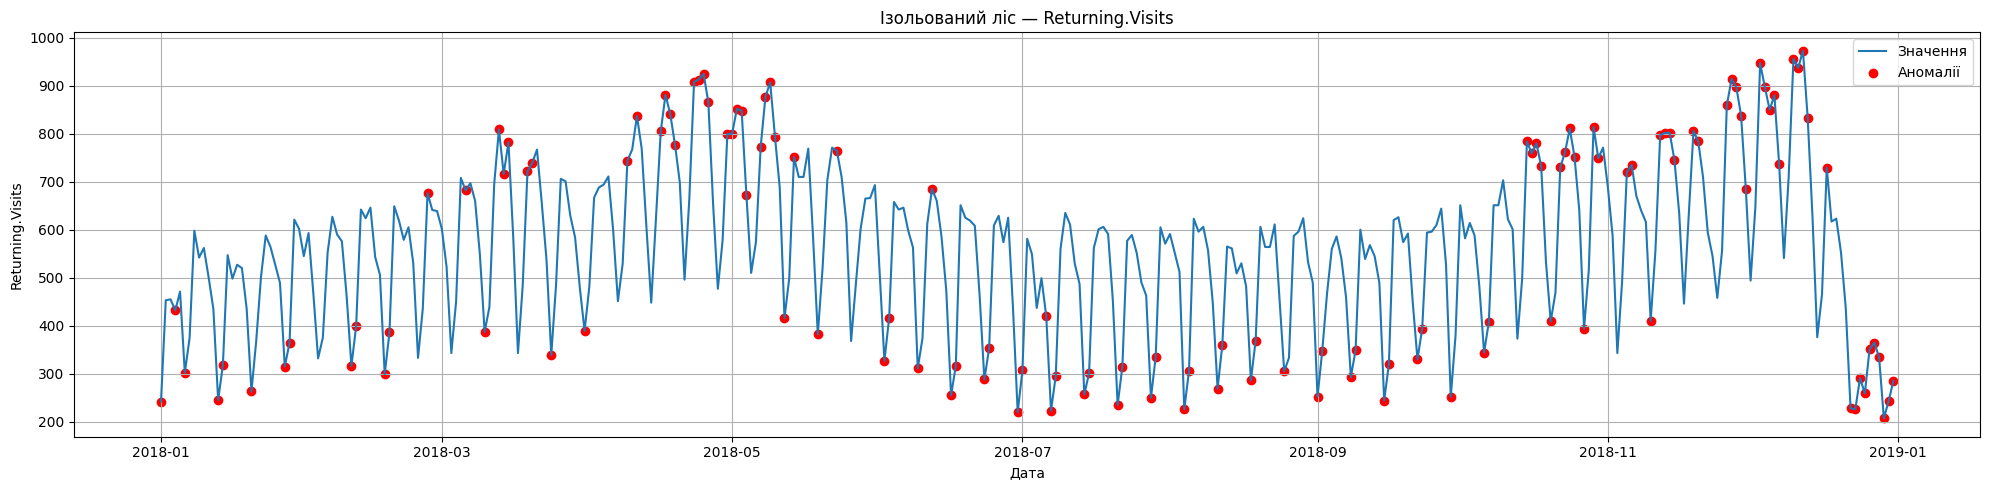

In [52]:
from sklearn.ensemble import IsolationForest

# Функція для побудови графіка з аномаліями
def draw_anomaly(data, anomalies, title):
    prop = data.columns[0]
    plt.figure(figsize=(20, 5))
    plt.plot(data.index, data[prop], label='Значення')
    plt.scatter(anomalies.index, anomalies[prop], color='red', label='Аномалії')
    plt.title(f"{title}")
    plt.xlabel("Дата")
    plt.ylabel(prop)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Функція Isolation Forest
def isolation_forest(data):
    prop = data.columns[0]
    model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
    pred = model.fit_predict(data[[prop]])
    return data[pred == -1]


for col in df_year_2018.columns:
    series = df_year_2018[[col]].copy()
    anomalies = isolation_forest(series)
    draw_anomaly(series, anomalies, f"Ізольований ліс — {col}")